# Introduction to Flux Balance Analysis

In this exercise you will learn how to perform flux balance analysis 
using a model of the central carbon metabolism of *E. coli*.

### Step 1: Loading a model stored in SBML format

In [1]:
from reframed import load_cbmodel
model = load_cbmodel('models/e_coli_core.xml.gz')

Let's learn some details about the model.

In [2]:
model.summary()

Metabolites:
e 20
c 52

Reactions:
enzymatic 48
transport 25
exchange 20
sink 0
other 2


### Step 2: running an FBA simulation

In [3]:
from reframed import FBA
solution = FBA(model)

The solution object contains the objective value (the growth rate in this case), and the respective flux distribution. 

In [4]:
print(solution)

Objective: 0.8739215069684306
Status: Optimal



Let's look at the uptake and secretion rates.

In [6]:
solution.show_values(pattern="R_EX", sort=True)

R_EX_o2_e    -21.7995
R_EX_glc__D_e -10
R_EX_nh4_e   -4.76532
R_EX_pi_e    -3.2149
R_EX_h_e      17.5309
R_EX_co2_e    22.8098
R_EX_h2o_e    29.1758


We can see that *E. coli* is consuming glucose and oxygen and producing CO2.

### Step 3: Visualizing fluxes with Escher

Escher is a tool for displaying fluxes in a metabolic map.

It makes your life easier, especially when comparing flux distributions after genetic or environmental perturbations.

In [7]:
from reframed import fluxes2escher

In [8]:
fluxes2escher(solution.values)

Builder(reaction_data={'ACALD': 0.0, 'ACALDt': 0.0, 'ACKr': 0.0, 'ACONTa': 6.007249575350329, 'ACONTb': 6.0072…

### Step 4: Changing the environmental conditions

Let's observe what happens if we cut down the oxygen supply. 

In [9]:
solution2 = FBA(model, constraints={'R_EX_o2_e':0})

In [10]:
print(solution2)

Objective: 0.21166294973531097
Status: Optimal



In [11]:
solution2.show_values(pattern="R_EX", sort=True)

R_EX_glc__D_e -10
R_EX_h2o_e   -7.1158
R_EX_nh4_e   -1.15416
R_EX_pi_e    -0.778644
R_EX_co2_e   -0.378178
R_EX_etoh_e   8.27946
R_EX_ac_e     8.50359
R_EX_for_e    17.8047
R_EX_h_e      30.5542


As expected, *E. coli* switched to a fermentation mode, which resulted in the secretion of fermentation products and a decrease in growth rate.

Again, we can see it better by displaying the flux distribution in a metabolic map.

In [12]:
fluxes2escher(solution2.values)

Builder(reaction_data={'ACALD': -8.279455380486585, 'ACALDt': 0.0, 'ACKr': -8.503585277961301, 'ACONTa': 0.228…

### Step 4: rational strain design

Imagine you want to produce succinate using *E. coli* under anaerobic conditions. Let's look at the so-called *production envelope*, which shows the relationship between growth and production.

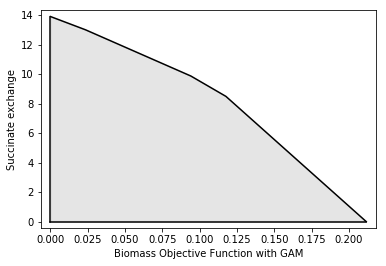

In [13]:
%matplotlib inline
from reframed import plot_flux_envelope

model.reactions.R_EX_o2_e.lb = 0

plot_flux_envelope(model, model.biomass_reaction, 'R_EX_succ_e')

We can see there is a trade-off between growing and secreting succinate, evolution is not on our side.

So let's re-engineer metabolism by gene knockout, which results in the deletion of the respective reactions.

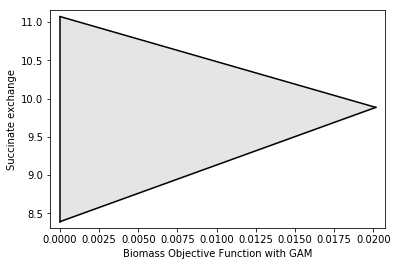

In [14]:
knockouts = {'R_PFL':0, 'R_LDH_D':0, 'R_ACALD':0, 'R_ACKr':0}

plot_flux_envelope(model, model.biomass_reaction, 'R_EX_succ_e', constraints=knockouts)

This is what we call a growth-coupled design. This *E. coli* mutant **must** secrete succinate in order to grow.

Let's see how this looks in terms of flux distribution.

In [15]:
solution3 = FBA(model, constraints=knockouts)

fluxes2escher(solution3.values)

Builder(reaction_data={'ACALD': 0.0, 'ACALDt': 0.0, 'ACKr': 0.0, 'ACONTa': 0.02174430340370236, 'ACONTb': 0.02…

Feel free to explore other features. Check the online documentation of the [**ReFramed**](https://reframed.readthedocs.io) library for details.